# **Start Section:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Uninstall existing scikit-learn to avoid conflicts
!pip uninstall -y scikit-learn
# Install specific versions of libraries to avoid conflicts
!pip install scikit-learn==1.5.2
!pip install bayesian-optimization==3.2.0
!pip install optuna==4.6.0
!pip install gpboost==1.6.1
!pip install shap==0.50.0
!pip install ngboost==0.5.8
!pip install dask[dataframe]==2025.12.0
!pip install torch==2.9.0+cpu
!pip install seaborn==0.13.2
!pip install lightgbm==4.6.0
!pip install xgboost==3.1.2
!pip install lime==0.2.0.1
!pip install interpret==0.7.4
!pip install optunahub==0.4.0
!pip install cmaes==0.12.0
!pip install plotly==5.24.1
!pip install kaleido==1.2.0
!pip install openpyxl==3.1.5
!pip install properscoring==0.1
!pip install XlsxWriter==3.2.9
!pip install cython==3.0.12
!pip install pgbm==2.2.0
!pip install cp==2020.12.3
!pip install mapie==0.6.0
!pip install skorch==1.3.1
!pip install puncc==0.8.0
# Reinstall scikit-learn to the version required by ngboost
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.1
# Reinstall numpy first
!pip install numpy==1.26.4  # Use the version compatible with catboost
# Reinstall catboost
!pip install catboost==1.2.8

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ngboost 0.5.8 requires scikit-learn<2.0,>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
interpret-core 0.7.4 requires scikit-learn>=1.6.0, but you have scikit-learn 1.5.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompati

  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
Found existing installation: scikit-learn 1.8.0
Uninstalling scikit-learn-1.8.0:
  Successfully uninstalled scikit-learn-1.8.0
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2


In [ ]:
# Restart the runtime to apply changes
import os
os._exit(00)

# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
import ngboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
from ngboost import NGBRegressor
import optuna
import optunahub
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel
from optuna.samplers import RandomSampler
import random
import time
from ngboost.distns import Normal
from ngboost.scores import LogScore
from scipy.stats import norm
from optuna.samplers import BaseSampler
from optuna.samplers import GridSampler
from optuna.samplers import TPESampler
from optuna.samplers import PartialFixedSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import QMCSampler
from optuna.samplers import NSGAIIISampler
from optuna.samplers import NSGAIISampler
from optuna.samplers import BruteForceSampler
from optuna.samplers import GPSampler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import plotly.express as px
from io import BytesIO
from openpyxl import Workbook, load_workbook
import os
import properscoring as ps
import io
from openpyxl.drawing.image import Image as openpyxlImage
import warnings
import xlsxwriter
from openpyxl.drawing.image import Image
from pgbm.sklearn import HistGradientBoostingRegressor
import torch
from pgbm.torch import PGBM
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import pickle
import json
from mapie.subsample import Subsample
from mapie.regression import MapieRegressor
from deel.puncc.metrics import regression_sharpness, regression_mean_coverage
from deel.puncc.api.prediction import BasePredictor, DualPredictor
from deel.puncc.regression import SplitCP, CVPlus, CQR
from deel.puncc.plotting import plot_prediction_intervals
from sklearn.model_selection import train_test_split
from typing_extensions import TypedDict
from typing import Union
from mapie.metrics import regression_coverage_score
from sklearn.model_selection import KFold
from PIL import Image as PImage
from openpyxl.utils.dataframe import dataframe_to_rows

In [2]:
train_data_path = "./drive/MyDrive/suspended sediment/SS_uncertainity/train.csv"
test_data_path = "./drive/MyDrive/suspended sediment/SS_uncertainity/test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print("Training data loaded successfully.")
print("Test data loaded successfully.")

Training data loaded successfully.
Test data loaded successfully.


In [3]:
print("\nShape of training data:", train_data.shape)
print("First 5 rows of training data:\n", train_data.head(5))
print("\nShape of test data:", test_data.shape)
print("First 5 rows of test data:\n", test_data.head(5))


Shape of training data: (1095, 4)
First 5 rows of training data:
       Qt   Qt-1    St-1      St
0  12.40  11.80  5930.0  5630.0
1   7.93  12.40  5630.0  1960.0
2   5.66   7.93  1960.0   491.0
3   5.04   5.66   491.0   692.0
4   4.84   5.04   692.0   452.0

Shape of test data: (365, 4)
First 5 rows of test data:
      Qt  Qt-1  St-1    St
0  5.27  5.49  45.0  44.0
1  5.13  5.27  44.0  29.0
2  4.84  5.13  29.0  23.0
3  5.04  4.84  23.0  26.0
4  5.21  5.04  26.0  30.0


In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
x_test= X_test
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1095, 3)
Shape of y_train: (1095,)
Shape of X_test: (365, 3)
Shape of y_test: (365,)


In [5]:
# Apply z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first five rows of the normalized data
print("\nFirst five rows of normalized X_train:")
print(X_train[:5])

print("\nFirst five rows of normalized X_test:")
print(X_test[:5])


First five rows of normalized X_train:
[[-0.13088871 -0.15525695  1.01508124]
 [-0.31063021 -0.131129    0.95334642]
 [-0.40190834 -0.31088224  0.19812377]
 [-0.42683893 -0.40216633 -0.10417107]
 [-0.43488105 -0.42709855 -0.06280874]]

First five rows of normalized X_test:
[[-0.41759048 -0.40900259 -0.19595018]
 [-0.42321997 -0.4178495  -0.19615596]
 [-0.43488105 -0.42347936 -0.1992427 ]
 [-0.42683893 -0.4351412  -0.2004774 ]
 [-0.42000312 -0.42709855 -0.19986005]]


# **Functions:**

In [6]:
feature_names = ['Qt', 'Qt-1', 'St-1']


In [7]:
def get_best_model_params(results, model_name):
    # Map model names to dictionary keys, assuming keys are strings like 'XGBoost' and not objects
    model_keys = {
        'LightGBM': 'LightGBM',
        'XGBoost': 'XGBoost',
        'GPBoost': 'GPBoost',
        'GBM': 'Gradient Boosting',
        'CatBoost': 'CatBoost',
        'NGBoost': 'NGBoost',
        'HGBR' : 'HistGradientBoosting',
        'PGBM' : 'PGBM'
    }

    # Ensure the requested model name is valid
    if model_name not in model_keys:
        raise ValueError(f"Model name '{model_name}' is not recognized. Available models are: {list(model_keys.keys())}")

    # Filter out entries for the specified model
    model_entries = {key: value for key, value in results.items() if key[0] == model_keys[model_name]}

    # Find the entry with the best (lowest) 'best_score'
    best_entry_key, best_entry_value = min(model_entries.items(), key=lambda item: item[1]['best_score'])

    # Return the best hyperparameters
    return best_entry_value['best_params']

In [8]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test.to_numpy()[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test.to_numpy()[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.to_numpy().ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

def conformal_predictions_MAPIE(model_class, best_params, X_train, y_train, X_test, y_test, model_name, excel_file_path):
    """
    Train and plot conformal prediction intervals using different strategies and save the plots and
    table of ymin/ymax/y_pred to different worksheets in an Excel file for each strategy.

    Parameters:
    - model_class: The class of the model to be used (e.g., LGBMRegressor).
    - best_params: Dictionary of best parameters for the model.
    - X_train: Training features.
    - y_train: Training target.
    - X_test: Test features.
    - y_test: Test target.
    - model_name: Name of the model for labeling purposes.
    - excel_file_path: Path to the Excel file where the plots will be saved.
    """
    # Set random seed for reproducibility
    SEED: int = 123
    np.random.seed(SEED)

    # Define miscoverage
    MISCOVERAGE: float = 0.05  # MISCOVERAGE = alpha # CONFIDENCE = 1-alpha
    warnings.filterwarnings("ignore")  # to suppress them

    # Create output directory
    os.makedirs('output/regression', exist_ok=True)

    # Define strategies and parameters
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Define base estimators
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    # Train strategies using MAPIE
    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set

    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred) # Corrected line: Removed y_test
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test.to_numpy() - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the results for the test set
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names) * 3 + 1 + len(_strategies) # Strategy plots + Goodness plots + Width plots + Comparison plot + Coverage vs Width plots
    fig, axs = plt.subplots(nrows=n_figs, figsize=(10, 5 * n_figs))

    plot_index = 0 # Keep track of the current plot index

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up, color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red', label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('Sediment load')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Combined plot for comparison
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up, alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name], label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('Sediment load')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1

    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted Sediment load')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1

    plt.tight_layout()

    # Save plots and tabular data to Excel
    with io.BytesIO() as buf:
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet for the plots
        workbook = load_workbook(excel_file_path)
        plot_sheet_name = 'conformal_predictions_MAPIE'
        if plot_sheet_name in workbook.sheetnames:
            plot_sheet_name += '_new'
        plot_worksheet = workbook.create_sheet(title=plot_sheet_name)
        plot_worksheet.add_image(img, 'A1')

        all_rows = []
        y_true_np = y_test.to_numpy().ravel()  # To save multiple conversions
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = (y_true_np >= ymin_np) & (y_true_np <= ymax_np)
            residual_np = y_true_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_true_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np.astype(int),
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet.cell(row=i+2, column=j, value=value)

        # Save the workbook
        workbook.save(excel_file_path)

    plt.close()



In [9]:
def conformal_predictions_PUNCC(
    X_train, y_train, X_test, y_test, best_scores_autosampler, model_class,
    excel_file_path=None, model_params=None, alpha=0.1
):
    # Determine the default parameters for the model, or use provided ones
    if model_params is None:
        if model_class.__name__ == 'LGBMRegressor':
            model_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
        else:
            model_params = {}

    # Initialize and train the model using the provided class and parameters
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    model.fit(X_train, y_train)

    def evaluate_cp(X_test, y_test, model_cp, alpha):
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test, alpha=alpha)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)
        return sharpness, coverage

    # Wrap the model in a BasePredictor
    base_predictor = BasePredictor(model, is_trained=True)

    # Initialize and fit the SplitCP conformal predictor
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train, fit_ratio=0.5)

    # Compute prediction intervals and metrics on the test set using SplitCP
    y_pred_splitcp, y_pred_lower_splitcp, y_pred_upper_splitcp = splitcp.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, splitcp, alpha)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"SplitCP - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for SplitCP
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    axs[0].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[0].fill_between(np.arange(len(y_test)), y_pred_lower_splitcp, y_pred_upper_splitcp, color='gray', alpha=0.5, label='Prediction interval')
    axs[0].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[0].set_title('Split Conformal Prediction')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Sediment load')
    axs[0].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Initialize and fit the CVPlus conformal predictor
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train)

    # Compute prediction intervals and metrics on the test set using CVPlus
    y_pred_cvplus, y_pred_lower_cvplus, y_pred_upper_cvplus = cvplus.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, cvplus, alpha)
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CVPlus - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CVPlus
    axs[1].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[1].fill_between(np.arange(len(y_test)), y_pred_lower_cvplus, y_pred_upper_cvplus, color='gray', alpha=0.5, label='Prediction interval')
    axs[1].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[1].set_title('Cross Validation Plus')
    axs[1].set_xlabel('Sample Number ')
    axs[1].set_ylabel('Sediment load')
    axs[1].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Split the training data into proper training (fit) set and calibration set
    X_fit, X_calib, y_fit, y_calib = train_test_split(
        X_train, y_train, test_size=0.5, random_state=0
    )

    # Fit the upper and lower quantile models
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)

    _ = upper_quantile_model.fit(X_fit, y_fit)
    _ = lower_quantile_model.fit(X_fit, y_fit)

    # Wrap the upper and lower quantile models in a dual predictor
    dualpredictor = DualPredictor(
        [lower_quantile_model, upper_quantile_model], is_trained=[True, True]
    )

    # Initialize the CQR conformal predictor
    cqr = CQR(
        dualpredictor, train=False
    )  # train=False to use the pre-trained dual predictor

    # Compute nonconformity scores on the calibration set
    cqr.fit(X_calib=X_calib, y_calib=y_calib)

    # Compute prediction intervals and metrics on the test set
    y_pred_cqr, y_pred_lower_cqr, y_pred_upper_cqr = cqr.predict(X_test, alpha=alpha)
    y_pred_cqr = 0.5 * (y_pred_lower_cqr + y_pred_upper_cqr)
    sharpness, coverage = evaluate_cp(X_test, y_test, cqr, alpha)

    print(f"CQR - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CQR - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CQR
    axs[2].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[2].fill_between(np.arange(len(y_test)), y_pred_lower_cqr, y_pred_upper_cqr, color='gray', alpha=0.5, label='Prediction interval')
    axs[2].plot(np.arange(len(y_test)), y_pred_cqr, color='red', label='Predicted mean', linewidth=1)
    axs[2].set_title('Conformalized Quantile Regression')
    axs[2].set_xlabel('Sample Number')
    axs[2].set_ylabel('Sediment load')
    axs[2].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'SplitCP_lower': np.asarray(y_pred_lower_splitcp).reshape(-1),
        'SplitCP_upper': np.asarray(y_pred_upper_splitcp).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'CVPlus_lower': np.asarray(y_pred_lower_cvplus).reshape(-1),
        'CVPlus_upper': np.asarray(y_pred_upper_cvplus).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_pred_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_pred_upper_cqr).reshape(-1),
    }

    # Save all plots and values to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

In [10]:
def prediction_MAPIE_analysis(
    X_train,
    y_train,
    X_test,
    y_test,
    model_cls,
    model_params,
    excel_file_path=None,
    suptitle: str = "Prediction Intervals"
) -> None:
    # Initialize and fit the model with MAPIE using provided parameters
    mdl = model_cls(**model_params)
    mapie = MapieRegressor(mdl, method="plus", cv=KFold(n_splits=5, shuffle=True))
    mapie.fit(X_train, y_train)

    alpha = np.arange(0.05, 1, 0.05)
    y_train_pred, y_train_pis = mapie.predict(X_train, alpha=alpha)
    y_test_pred, y_test_pis = mapie.predict(X_test, alpha=alpha)

    # Visualization function
    def plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pred_low,
        y_train_pred_high,
        y_test,
        y_test_pred,
        y_test_pred_low,
        y_test_pred_high,
        suptitle: str,
    ) -> None:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

        ax1.errorbar(
            x=y_train,
            y=y_train_pred,
            yerr=(np.abs(y_train_pred - y_train_pred_low), np.abs(y_train_pred_high - y_train_pred)),
            alpha=0.8,
            label="train",
            fmt=".",
        )
        ax1.errorbar(
            x=y_test,
            y=y_test_pred,
            yerr=(np.abs(y_test_pred - y_test_pred_low), np.abs(y_test_pred_high - y_test_pred)),
            alpha=0.8,
            label="test",
            fmt=".",
        )
        ax1.plot(
            [y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            color="gray",
            alpha=0.5,
        )
        ax1.set_xlabel("Actual Sediment load", fontsize=12)
        ax1.set_ylabel("Predicted Sediment load", fontsize=12)
        ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

        ax2.scatter(
            x=y_train, y=y_train_pred_high - y_train_pred_low, alpha=0.8, label="train", marker="."
        )
        ax2.scatter(x=y_test, y=y_test_pred_high - y_test_pred_low, alpha=0.8, label="test", marker=".")
        ax2.set_xlabel("Actual Sediment load", fontsize=12)
        ax2.set_ylabel("Interval width", fontsize=12)
        ax2.set_xscale("linear")
        ax2.set_ylim([0, np.max(y_test_pred_high - y_test_pred_low)*1.1])
        ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        std_all = np.concatenate([
            y_train_pred_high - y_train_pred_low, y_test_pred_high - y_test_pred_low
        ])
        type_all = np.array(["train"] * len(y_train) + ["test"] * len(y_test))
        x_all = np.arange(len(std_all))
        order_all = np.argsort(std_all)
        std_order = std_all[order_all]
        type_order = type_all[order_all]
        ax3.scatter(
            x=x_all[type_order == "train"],
            y=std_order[type_order == "train"],
            alpha=0.8,
            label="train",
            marker=".",
        )
        ax3.scatter(
            x=x_all[type_order == "test"],
            y=std_order[type_order == "test"],
            alpha=0.8,
            label="test",
            marker=".",
        )
        ax3.set_xlabel("Order", fontsize=12)
        ax3.set_ylabel("Interval width", fontsize=12)
        ax3.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        ax1.set_title("Actual vs Predicted Sediment load")
        ax2.set_title("Prediction interval width vs Actual Sediment load")
        ax3.set_title("Ordered prediction interval width")
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.suptitle(suptitle, size=20)

        # Save plot to Excel
        if excel_file_path:
            save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_1')

        plt.close(fig)

    alpha_plot = int(np.where(alpha == 0.1)[0])
    plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pis[:, 0, alpha_plot],
        y_train_pis[:, 1, alpha_plot],
        y_test,
        y_test_pred,
        y_test_pis[:, 0, alpha_plot],
        y_test_pis[:, 1, alpha_plot],
        suptitle,
    )

    # Comparison of the uncertainty quantification methods
    Params = TypedDict("Params", {"method": str, "cv": Union[int, Subsample]})
    STRATEGIES = {
        "naive": Params(method="naive"),
        "cv": Params(method="base", cv=5),
        "cv_plus": Params(method="plus", cv=5),
        "cv_minmax": Params(method="minmax", cv=5),
        "jackknife_plus_ab": Params(method="plus", cv=Subsample(n_resamplings=20)),
    }
    y_pred, y_pis, scores = {}, {}, {}
    for strategy, params in STRATEGIES.items():
        mapie = MapieRegressor(mdl, **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha)
        scores[strategy] = [
            regression_coverage_score(y_test, y_pis[strategy][:, 0, i], y_pis[strategy][:, 1, i])
            for i, _ in enumerate(alpha)
        ]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("Target coverage (1 - alpha)")
    ax.set_ylabel("Effective coverage")
    for strategy, params in STRATEGIES.items():
        ax.plot(1 - alpha, scores[strategy], label=strategy)
    plt.subplots_adjust(right=0.75)
    ax.plot([0, 1], [0, 1], ls="--", color="k")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0.)

    # Save plot to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_2')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

# **Hyperparameter Tuning using Autosampler Optuna**

In [12]:
best_scores_autosampler = {('Random Forest', 'MedianPruner'): {'best_score': 115445.84025987175,
  'best_params': {'n_estimators': 500,
   'criterion': 'absolute_error',
   'max_depth': 40,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.1,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.1},
  'test_mse': 115445.84025987175,
  'test_rmse': 339.7732188679263,
  'test_corr_coef': 0.96169433901003,
  'pruner': 'MedianPruner'},
 ('Random Forest', 'NopPruner'): {'best_score': 124300.78947351058,
  'best_params': {'n_estimators': 300,
   'criterion': 'absolute_error',
   'max_depth': 40,
   'min_samples_split': 0.01,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.5,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 124300.78947351058,
  'test_rmse': 352.56317089779895,
  'test_corr_coef': 0.9583667887344195,
  'pruner': 'NopPruner'},
 ('Random Forest', 'PatientPruner'): {'best_score': 115709.3495505711,
  'best_params': {'n_estimators': 300,
   'criterion': 'absolute_error',
   'max_depth': 40,
   'min_samples_split': 0.01,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 115709.3495505711,
  'test_rmse': 340.1607701522489,
  'test_corr_coef': 0.9615034293000627,
  'pruner': 'PatientPruner'},
 ('Random Forest', 'PercentilePruner'): {'best_score': 115695.85721349296,
  'best_params': {'n_estimators': 300,
   'criterion': 'absolute_error',
   'max_depth': 20,
   'min_samples_split': 0.01,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.1,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.1},
  'test_mse': 115695.85721349296,
  'test_rmse': 340.1409372796708,
  'test_corr_coef': 0.9614950904710443,
  'pruner': 'PercentilePruner'},
 ('Random Forest',
  'SuccessiveHalvingPruner'): {'best_score': 124878.59430234428, 'best_params': {'n_estimators': 700,
   'criterion': 'absolute_error',
   'max_depth': 10,
   'min_samples_split': 10,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.3,
   'max_leaf_nodes': 200,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0}, 'test_mse': 124878.59430234428, 'test_rmse': 353.3816552996834, 'test_corr_coef': 0.9581724326030636, 'pruner': 'SuccessiveHalvingPruner'},
 ('Random Forest', 'HyperbandPruner'): {'best_score': 125209.16042284996,
  'best_params': {'n_estimators': 700,
   'criterion': 'absolute_error',
   'max_depth': 40,
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.5,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.1,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.1},
  'test_mse': 125209.16042284996,
  'test_rmse': 353.84906446513315,
  'test_corr_coef': 0.958066525707693,
  'pruner': 'HyperbandPruner'},
 ('Random Forest', 'ThresholdPruner'): {'best_score': 115626.85442639538,
  'best_params': {'n_estimators': 700,
   'criterion': 'absolute_error',
   'max_depth': 40,
   'min_samples_split': 10,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.1,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 115626.85442639538,
  'test_rmse': 340.0394895102558,
  'test_corr_coef': 0.9615881193124336,
  'pruner': 'ThresholdPruner'},
 ('Random Forest', 'WilcoxonPruner'): {'best_score': 125104.33273390731,
  'best_params': {'n_estimators': 700,
   'criterion': 'absolute_error',
   'max_depth': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 'sqrt',
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.1,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 125104.33273390731,
  'test_rmse': 353.7009085850746,
  'test_corr_coef': 0.9581069511571473,
  'pruner': 'WilcoxonPruner'},
 ('Gradient Boosting', 'MedianPruner'): {'best_score': 96730.91390013314,
  'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.2,
   'n_estimators': 100,
   'subsample': 0.7,
   'criterion': 'friedman_mse',
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 7,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 50,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.0001,
   'ccp_alpha': 0.0},
  'test_mse': 96730.91390013314,
  'test_rmse': 311.0159383377854,
  'test_corr_coef': 0.967724002228738,
  'pruner': 'MedianPruner'},
 ('Gradient Boosting', 'NopPruner'): {'best_score': 117391.54060516435,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.05,
   'n_estimators': 500,
   'subsample': 0.7,
   'criterion': 'friedman_mse',
   'min_samples_split': 5,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 5,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.01},
  'test_mse': 117391.54060516435,
  'test_rmse': 342.62448920817724,
  'test_corr_coef': 0.9660270218186406,
  'pruner': 'NopPruner'},
 ('Gradient Boosting', 'PatientPruner'): {'best_score': 113953.86556942694,
  'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.1,
   'n_estimators': 200,
   'subsample': 1.0,
   'criterion': 'friedman_mse',
   'min_samples_split': 0.01,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 50,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 113953.86556942694,
  'test_rmse': 337.5705342138543,
  'test_corr_coef': 0.9619357940143247,
  'pruner': 'PatientPruner'},
 ('Gradient Boosting', 'PercentilePruner'): {'best_score': 93839.49054251134,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.2,
   'n_estimators': 300,
   'subsample': 0.7,
   'criterion': 'squared_error',
   'min_samples_split': 5,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 3,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 93839.49054251134,
  'test_rmse': 306.33232043405303,
  'test_corr_coef': 0.9696368696192813,
  'pruner': 'PercentilePruner'},
 ('Gradient Boosting',
  'SuccessiveHalvingPruner'): {'best_score': 115634.38529430331, 'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.1,
   'n_estimators': 200,
   'subsample': 0.9,
   'criterion': 'friedman_mse',
   'min_samples_split': 5,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 10,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.0001,
   'ccp_alpha': 0.001}, 'test_mse': 115634.38529430331, 'test_rmse': 340.0505628495611, 'test_corr_coef': 0.9622410130273735, 'pruner': 'SuccessiveHalvingPruner'},
 ('Gradient Boosting', 'HyperbandPruner'): {'best_score': 97295.8002100565,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.1,
   'n_estimators': 700,
   'subsample': 1.0,
   'criterion': 'squared_error',
   'min_samples_split': 5,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 97295.8002100565,
  'test_rmse': 311.92274718278645,
  'test_corr_coef': 0.9682317320416799,
  'pruner': 'HyperbandPruner'},
 ('Gradient Boosting', 'ThresholdPruner'): {'best_score': 100473.50063249908,
  'best_params': {'loss': 'absolute_error',
   'learning_rate': 0.2,
   'n_estimators': 500,
   'subsample': 1.0,
   'criterion': 'friedman_mse',
   'min_samples_split': 0.01,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 7,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 100473.50063249908,
  'test_rmse': 316.97555210536206,
  'test_corr_coef': 0.9713968903978637,
  'pruner': 'ThresholdPruner'},
 ('Gradient Boosting', 'WilcoxonPruner'): {'best_score': 91295.04963213205,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.05,
   'n_estimators': 200,
   'subsample': 0.9,
   'criterion': 'friedman_mse',
   'min_samples_split': 10,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 7,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 50,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.0001,
   'ccp_alpha': 0.0},
  'test_mse': 91295.04963213205,
  'test_rmse': 302.15070682050714,
  'test_corr_coef': 0.9706148529579521,
  'pruner': 'WilcoxonPruner'},
 ('XGBoost', 'MedianPruner'): {'best_score': 161604.32940497226,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.15,
   'max_depth': 7,
   'min_child_weight': 5,
   'gamma': 0.1,
   'subsample': 0.6,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 161604.32940497226,
  'test_rmse': 402.0004097074682,
  'test_corr_coef': 0.9538132666132731,
  'pruner': 'MedianPruner'},
 ('XGBoost', 'NopPruner'): {'best_score': 112488.96997349258,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_depth': 5,
   'min_child_weight': 1,
   'gamma': 0.1,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 112488.96997349258,
  'test_rmse': 335.39375362921203,
  'test_corr_coef': 0.965644507528724,
  'pruner': 'NopPruner'},
 ('XGBoost', 'PatientPruner'): {'best_score': 142255.3701104488,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_depth': 7,
   'min_child_weight': 3,
   'gamma': 0.5,
   'subsample': 0.7,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 142255.3701104488,
  'test_rmse': 377.1675623783795,
  'test_corr_coef': 0.9646911801374679,
  'pruner': 'PatientPruner'},
 ('XGBoost', 'PercentilePruner'): {'best_score': 129482.46992030117,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 7,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 129482.46992030117,
  'test_rmse': 359.8367267529833,
  'test_corr_coef': 0.9613555848725358,
  'pruner': 'PercentilePruner'},
 ('XGBoost', 'SuccessiveHalvingPruner'): {'best_score': 133119.10175005987,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_depth': 7,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 133119.10175005987,
  'test_rmse': 364.8549050650955,
  'test_corr_coef': 0.9660581248166088,
  'pruner': 'SuccessiveHalvingPruner'},
 ('XGBoost', 'HyperbandPruner'): {'best_score': 118836.69468618002,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_depth': 7,
   'min_child_weight': 1,
   'gamma': 0.1,
   'subsample': 0.9,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 118836.69468618002,
  'test_rmse': 344.72698572374634,
  'test_corr_coef': 0.9676119145094123,
  'pruner': 'HyperbandPruner'},
 ('XGBoost', 'ThresholdPruner'): {'best_score': 128439.8396842536,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'max_depth': 5,
   'min_child_weight': 1,
   'gamma': 0.1,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 128439.8396842536,
  'test_rmse': 358.38504389030186,
  'test_corr_coef': 0.9620815528039613,
  'pruner': 'ThresholdPruner'},
 ('XGBoost', 'WilcoxonPruner'): {'best_score': 131223.9051661976,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.05,
   'max_depth': 7,
   'min_child_weight': 1,
   'gamma': 0.1,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 10,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 131223.9051661976,
  'test_rmse': 362.24840257232,
  'test_corr_coef': 0.9632794933463062,
  'pruner': 'WilcoxonPruner'},
 ('LightGBM', 'MedianPruner'): {'best_score': 87407.08784853501,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': 7,
   'min_child_samples': 1,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'min_child_weight': 1e-05,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 87407.08784853501,
  'test_rmse': 295.64689724151515,
  'test_corr_coef': 0.9716567976885585,
  'pruner': 'MedianPruner'},
 ('LightGBM', 'NopPruner'): {'best_score': 117352.40106323325,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 5,
   'subsample': 1.0,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.01,
   'reg_lambda': 0,
   'min_child_weight': 0.1,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 117352.40106323325,
  'test_rmse': 342.56736718962776,
  'test_corr_coef': 0.9639910064603326,
  'pruner': 'NopPruner'},
 ('LightGBM', 'PatientPruner'): {'best_score': 99873.1098338728,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'num_leaves': 31,
   'max_depth': -1,
   'min_child_samples': 20,
   'subsample': 0.9,
   'colsample_bytree': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.001,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 99873.1098338728,
  'test_rmse': 316.02707136236415,
  'test_corr_coef': 0.9672191163945896,
  'pruner': 'PatientPruner'},
 ('LightGBM', 'PercentilePruner'): {'best_score': 117261.94377590119,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': -1,
   'min_child_samples': 5,
   'subsample': 0.5,
   'colsample_bytree': 1.0,
   'reg_alpha': 0,
   'reg_lambda': 10,
   'min_child_weight': 0.001,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 117261.94377590119,
  'test_rmse': 342.4353132723043,
  'test_corr_coef': 0.9681795781195918,
  'pruner': 'PercentilePruner'},
 ('LightGBM', 'SuccessiveHalvingPruner'): {'best_score': 98698.64482546967,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': -1,
   'min_child_samples': 20,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 1,
   'reg_lambda': 1,
   'min_child_weight': 0.1,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 98698.64482546967,
  'test_rmse': 314.16340465666855,
  'test_corr_coef': 0.9677691318474797,
  'pruner': 'SuccessiveHalvingPruner'},
 ('LightGBM', 'HyperbandPruner'): {'best_score': 117125.77970181806,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': -1,
   'min_child_samples': 20,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 0.01,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 117125.77970181806,
  'test_rmse': 342.2364383022621,
  'test_corr_coef': 0.9658085135122038,
  'pruner': 'HyperbandPruner'},
 ('LightGBM', 'ThresholdPruner'): {'best_score': 88267.07649394116,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': 7,
   'min_child_samples': 10,
   'subsample': 0.6,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.1,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 88267.07649394116,
  'test_rmse': 297.09775578745314,
  'test_corr_coef': 0.9711486770215534,
  'pruner': 'ThresholdPruner'},
 ('LightGBM', 'WilcoxonPruner'): {'best_score': 87811.47894227633,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': 5,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 1.0,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'min_child_weight': 0.01,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 87811.47894227633,
  'test_rmse': 296.3300169444134,
  'test_corr_coef': 0.971583450228354,
  'pruner': 'WilcoxonPruner'},
 ('GPBoost', 'MedianPruner'): {'best_score': 113349.23632211209,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.5,
   'reg_lambda': 1.0,
   'min_child_weight': 1e-05,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 113349.23632211209,
  'test_rmse': 336.6737832414518,
  'test_corr_coef': 0.9658875903381958,
  'pruner': 'MedianPruner'},
 ('GPBoost', 'NopPruner'): {'best_score': 114944.95044290234,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': -1,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.7,
   'colsample_bytree': 1.0,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 114944.95044290234,
  'test_rmse': 339.03532329670657,
  'test_corr_coef': 0.9641386366817238,
  'pruner': 'NopPruner'},
 ('GPBoost', 'PatientPruner'): {'best_score': 114944.95044290234,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': -1,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.8,
   'colsample_bytree': 1.0,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 1e-05,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 114944.95044290234,
  'test_rmse': 339.03532329670657,
  'test_corr_coef': 0.9641386366817238,
  'pruner': 'PatientPruner'},
 ('GPBoost', 'PercentilePruner'): {'best_score': 114992.41068358872,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': -1,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 114992.41068358872,
  'test_rmse': 339.1053091350661,
  'test_corr_coef': 0.9640289798505173,
  'pruner': 'PercentilePruner'},
 ('GPBoost', 'SuccessiveHalvingPruner'): {'best_score': 115848.73836047317,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': 7,
   'num_leaves': 31,
   'min_child_samples': 20,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 1.0,
   'reg_lambda': 0.5,
   'min_child_weight': 1e-05,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 115848.73836047317,
  'test_rmse': 340.36559514803076,
  'test_corr_coef': 0.9639652570331289,
  'pruner': 'SuccessiveHalvingPruner'},
 ('GPBoost', 'HyperbandPruner'): {'best_score': 111553.55203039899,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 15,
   'min_child_samples': 5,
   'subsample': 0.9,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.5,
   'reg_lambda': 0.5,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 111553.55203039899,
  'test_rmse': 333.9963353547446,
  'test_corr_coef': 0.9658651163094684,
  'pruner': 'HyperbandPruner'},
 ('GPBoost', 'ThresholdPruner'): {'best_score': 113698.78610316526,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 0.9,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.1,
   'reg_lambda': 0.5,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 113698.78610316526,
  'test_rmse': 337.1925060008974,
  'test_corr_coef': 0.9659913413538915,
  'pruner': 'ThresholdPruner'},
 ('GPBoost', 'WilcoxonPruner'): {'best_score': 120261.34378515356,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 63,
   'min_child_samples': 5,
   'subsample': 0.9,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.1,
   'reg_lambda': 1.0,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 120261.34378515356,
  'test_rmse': 346.787173616836,
  'test_corr_coef': 0.9629667659459674,
  'pruner': 'WilcoxonPruner'},
 ('CatBoost', 'MedianPruner'): {'best_score': 101537.83907013081,
  'best_params': {'iterations': 200,
   'learning_rate': 0.03,
   'depth': 10,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 5,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 101537.83907013081,
  'test_rmse': 318.65002600051804,
  'test_corr_coef': 0.9666880340359085,
  'pruner': 'MedianPruner'},
 ('CatBoost', 'NopPruner'): {'best_score': 106739.36867174642,
  'best_params': {'iterations': 200,
   'learning_rate': 0.03,
   'depth': 6,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 106739.36867174642,
  'test_rmse': 326.709915172078,
  'test_corr_coef': 0.9645246862965655,
  'pruner': 'NopPruner'},
 ('CatBoost', 'PatientPruner'): {'best_score': 104254.99075610514,
  'best_params': {'iterations': 200,
   'learning_rate': 0.05,
   'depth': 10,
   'l2_leaf_reg': 3,
   'border_count': 64,
   'min_data_in_leaf': 5,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 104254.99075610514,
  'test_rmse': 322.8854142820718,
  'test_corr_coef': 0.9656696291208536,
  'pruner': 'PatientPruner'},
 ('CatBoost', 'PercentilePruner'): {'best_score': 104254.99075610514,
  'best_params': {'iterations': 200,
   'learning_rate': 0.05,
   'depth': 10,
   'l2_leaf_reg': 3,
   'border_count': 64,
   'min_data_in_leaf': 20,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 104254.99075610514,
  'test_rmse': 322.8854142820718,
  'test_corr_coef': 0.9656696291208536,
  'pruner': 'PercentilePruner'},
 ('CatBoost', 'SuccessiveHalvingPruner'): {'best_score': 133156.51804066967,
  'best_params': {'iterations': 200,
   'learning_rate': 0.1,
   'depth': 6,
   'l2_leaf_reg': 9,
   'border_count': 32,
   'min_data_in_leaf': 5,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 133156.51804066967,
  'test_rmse': 364.90617703824864,
  'test_corr_coef': 0.9570002692636385,
  'pruner': 'SuccessiveHalvingPruner'},
 ('CatBoost', 'HyperbandPruner'): {'best_score': 112692.70749530997,
  'best_params': {'iterations': 500,
   'learning_rate': 0.05,
   'depth': 6,
   'l2_leaf_reg': 7,
   'border_count': 64,
   'min_data_in_leaf': 5,
   'rsm': 0.6,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 112692.70749530997,
  'test_rmse': 335.69734508230766,
  'test_corr_coef': 0.9627534442293013,
  'pruner': 'HyperbandPruner'},
 ('CatBoost', 'ThresholdPruner'): {'best_score': 116933.23841729086,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 9,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 1.0,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 116933.23841729086,
  'test_rmse': 341.9550239684904,
  'test_corr_coef': 0.9612549535314208,
  'pruner': 'ThresholdPruner'},
 ('CatBoost', 'WilcoxonPruner'): {'best_score': 104254.99075610514,
  'best_params': {'iterations': 200,
   'learning_rate': 0.05,
   'depth': 10,
   'l2_leaf_reg': 3,
   'border_count': 64,
   'min_data_in_leaf': 20,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 104254.99075610514,
  'test_rmse': 322.8854142820718,
  'test_corr_coef': 0.9656696291208536,
  'pruner': 'WilcoxonPruner'},
 ('NGBoost', 'MedianPruner'): {'best_score': 175474.46257830338,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 175474.46257830338,
  'test_rmse': 418.89672065833054,
  'test_corr_coef': 0.9642544940299274,
  'pruner': 'MedianPruner'},
 ('NGBoost', 'NopPruner'): {'best_score': 251364.2961350045,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.03,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 251364.2961350045,
  'test_rmse': 501.3624398925437,
  'test_corr_coef': 0.9420967812956701,
  'pruner': 'NopPruner'},
 ('NGBoost', 'PatientPruner'): {'best_score': 229144.93053955596,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.03,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 229144.93053955596,
  'test_rmse': 478.69085069547333,
  'test_corr_coef': 0.9450164011236241,
  'pruner': 'PatientPruner'},
 ('NGBoost', 'PercentilePruner'): {'best_score': 146328.35162440056,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 146328.35162440056,
  'test_rmse': 382.5288899212719,
  'test_corr_coef': 0.9590178853967538,
  'pruner': 'PercentilePruner'},
 ('NGBoost', 'SuccessiveHalvingPruner'): {'best_score': 155293.64832449105,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 155293.64832449105,
  'test_rmse': 394.0731509815038,
  'test_corr_coef': 0.9645995167819726,
  'pruner': 'SuccessiveHalvingPruner'},
 ('NGBoost', 'HyperbandPruner'): {'best_score': 172122.55061707806,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.9,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 172122.55061707806,
  'test_rmse': 414.87654864679695,
  'test_corr_coef': 0.9641128605695809,
  'pruner': 'HyperbandPruner'},
 ('NGBoost', 'ThresholdPruner'): {'best_score': 162797.54603494357,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.03,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 162797.54603494357,
  'test_rmse': 403.48177906188477,
  'test_corr_coef': 0.953510095178476,
  'pruner': 'ThresholdPruner'},
 ('NGBoost', 'WilcoxonPruner'): {'best_score': 157538.72463681313,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 157538.72463681313,
  'test_rmse': 396.91148211762925,
  'test_corr_coef': 0.9641417639975214,
  'pruner': 'WilcoxonPruner'},
 ('HistGradientBoosting', 'MedianPruner'): {'best_score': 102716.42688406812,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.0,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 102716.42688406812,
  'test_rmse': 320.49403564507736,
  'test_corr_coef': 0.9673065646595106,
  'pruner': 'MedianPruner'},
 ('HistGradientBoosting', 'NopPruner'): {'best_score': 100106.89075156266,
  'best_params': {'learning_rate': 0.15,
   'max_iter': 500,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 100106.89075156266,
  'test_rmse': 316.3967299950533,
  'test_corr_coef': 0.9672427913785818,
  'pruner': 'NopPruner'},
 ('HistGradientBoosting', 'PatientPruner'): {'best_score': 104514.97288846865,
  'best_params': {'learning_rate': 0.15,
   'max_iter': 500,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 104514.97288846865,
  'test_rmse': 323.287755549864,
  'test_corr_coef': 0.9684537582226004,
  'pruner': 'PatientPruner'},
 ('HistGradientBoosting',
  'PercentilePruner'): {'best_score': 121949.51623357667, 'best_params': {'learning_rate': 0.01,
   'max_iter': 300,
   'max_depth': None,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 63,
   'l2_regularization': 1.0,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 121949.51623357667, 'test_rmse': 349.2127091524257, 'test_corr_coef': 0.9684757751613785, 'pruner': 'PercentilePruner'},
 ('HistGradientBoosting',
  'SuccessiveHalvingPruner'): {'best_score': 99390.95699106115, 'best_params': {'learning_rate': 0.15,
   'max_iter': 500,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': None,
   'l2_regularization': 1.0,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 99390.95699106115, 'test_rmse': 315.2633137411664, 'test_corr_coef': 0.9673015073846678, 'pruner': 'SuccessiveHalvingPruner'},
 ('HistGradientBoosting',
  'HyperbandPruner'): {'best_score': 115736.45769234264, 'best_params': {'learning_rate': 0.15,
   'max_iter': 300,
   'max_depth': None,
   'min_samples_leaf': 20,
   'max_leaf_nodes': 15,
   'l2_regularization': 1.0,
   'max_bins': 128,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 115736.45769234264, 'test_rmse': 340.200613891778, 'test_corr_coef': 0.9636527894473842, 'pruner': 'HyperbandPruner'},
 ('HistGradientBoosting',
  'ThresholdPruner'): {'best_score': 100106.89075156266, 'best_params': {'learning_rate': 0.15,
   'max_iter': 400,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 100106.89075156266, 'test_rmse': 316.3967299950533, 'test_corr_coef': 0.9672427913785818, 'pruner': 'ThresholdPruner'},
 ('HistGradientBoosting', 'WilcoxonPruner'): {'best_score': 101709.92992105405,
  'best_params': {'learning_rate': 0.05,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 15,
   'l2_regularization': 1.0,
   'max_bins': 255,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 101709.92992105405,
  'test_rmse': 318.91994280862093,
  'test_corr_coef': 0.9688923783881614,
  'pruner': 'WilcoxonPruner'},
 ('PGBM', 'MedianPruner'): {'best_score': 95660.77150048228,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_leaves': 49,
   'min_split_gain': 0.0,
   'reg_lambda': 10.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 128,
   'distribution': 'studentt'},
  'test_mse': 95660.77150048228,
  'test_rmse': 309.2907556013957,
  'test_corr_coef': 0.968370012304476,
  'pruner': 'MedianPruner'},
 ('PGBM', 'NopPruner'): {'best_score': 95827.92350275,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_leaves': 63,
   'min_split_gain': 0.0,
   'reg_lambda': 5.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 10,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 95827.92350275,
  'test_rmse': 309.5608558954927,
  'test_corr_coef': 0.9695887061354466,
  'pruner': 'NopPruner'},
 ('PGBM', 'PatientPruner'): {'best_score': 96602.8810727881,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_leaves': 15,
   'min_split_gain': 0.1,
   'reg_lambda': 5.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 96602.8810727881,
  'test_rmse': 310.8100401737179,
  'test_corr_coef': 0.9685570252743576,
  'pruner': 'PatientPruner'},
 ('PGBM', 'PercentilePruner'): {'best_score': 83887.24448264069,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_leaves': 50,
   'min_split_gain': 0.1,
   'reg_lambda': 10.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 5,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 83887.24448264069,
  'test_rmse': 289.6329478540739,
  'test_corr_coef': 0.9722949774701968,
  'pruner': 'PercentilePruner'},
 ('PGBM', 'SuccessiveHalvingPruner'): {'best_score': 96934.69472088314,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_leaves': 31,
   'min_split_gain': 0.1,
   'reg_lambda': 1.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.3,
   'min_data_in_leaf': 10,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 96934.69472088314,
  'test_rmse': 311.34337108871154,
  'test_corr_coef': 0.9702896527493134,
  'pruner': 'SuccessiveHalvingPruner'},
 ('PGBM', 'HyperbandPruner'): {'best_score': 98316.7506707218,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_leaves': 38,
   'min_split_gain': 1.0,
   'reg_lambda': 10.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 128,
   'distribution': 'laplace'},
  'test_mse': 98316.7506707218,
  'test_rmse': 313.55502016507694,
  'test_corr_coef': 0.9698149082129673,
  'pruner': 'HyperbandPruner'},
 ('PGBM', 'ThresholdPruner'): {'best_score': 90075.21363887351,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_leaves': 47,
   'min_split_gain': 0.5,
   'reg_lambda': 10.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 5,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 90075.21363887351,
  'test_rmse': 300.12532988548884,
  'test_corr_coef': 0.9708675325718685,
  'pruner': 'ThresholdPruner'},
 ('PGBM', 'WilcoxonPruner'): {'best_score': 92748.36356188676,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_leaves': 56,
   'min_split_gain': 1.0,
   'reg_lambda': 1.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 10,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 92748.36356188676,
  'test_rmse': 304.5461599854557,
  'test_corr_coef': 0.9708042066928073,
  'pruner': 'WilcoxonPruner'}}

# **Conformal Predictions with Lightgbm**

In [13]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')

In [14]:
conformal_predictions_MAPIE(LGBMRegressor, best_params, X_train, y_train, X_test, y_test, "LightGBM","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/LightGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 295.6469
  Interval Width: 2520.0207
  Coverage: 88.79%
  CWC: 2802.5429
  SSC: 6437911.3241

Strategy: Cross Validation +
  RMSE: 295.6469
  Interval Width: 2693.6950
  Coverage: 88.80%
  CWC: 2995.3645
  SSC: 7349582.9458

Strategy: Jackknife+ after Bootstrapping
  RMSE: 295.6469
  Interval Width: 2126.2383
  Coverage: 87.03%
  CWC: 2401.9750
  SSC: 4736660.6239



In [15]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, LGBMRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/LightGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 986.982
SplitCP - Average coverage: 95.342%
CVPlus - Average prediction intervals width (sharpness): 1089.004
CVPlus - Average coverage: 96.438%
CQR - Average prediction intervals width (sharpness): 1126.236
CQR - Average coverage: 95.890%


In [16]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, LGBMRegressor, best_params, "./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/LightGBM.xlsx", "LightGBM Prediction Intervals")

# **Conformal Predictions with XGBoost**

In [17]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')

In [18]:
conformal_predictions_MAPIE(XGBRegressor, best_params, X_train, y_train, X_test, y_test, "XGBoost", "./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/XGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 335.3938
  Interval Width: 6237.2529
  Coverage: 89.74%
  CWC: 6877.0600
  SSC: 39015813.0789

Strategy: Cross Validation +
  RMSE: 335.3938
  Interval Width: 7296.8453
  Coverage: 91.21%
  CWC: 7938.0475
  SSC: 53360251.0314

Strategy: Jackknife+ after Bootstrapping
  RMSE: 335.3938
  Interval Width: 2256.7217
  Coverage: 86.74%
  CWC: 2555.9692
  SSC: 5501260.8542



In [19]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, XGBRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/XGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 1183.182
SplitCP - Average coverage: 93.699%
CVPlus - Average prediction intervals width (sharpness): 1201.870
CVPlus - Average coverage: 96.712%
CQR - Average prediction intervals width (sharpness): 1196.117
CQR - Average coverage: 95.068%


In [20]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, XGBRegressor, best_params,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/XGBoost.xlsx", "XGBR Prediction Intervals")

# **Conformal Predictions with GPBoost**

In [21]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')

In [22]:
conformal_predictions_MAPIE(GPBoostRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/GPBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 333.9963
  Interval Width: 11087.2613
  Coverage: 93.55%
  CWC: 11802.8879
  SSC: 123038916.0067

Strategy: Cross Validation +
  RMSE: 333.9963
  Interval Width: 6586.9248
  Coverage: 90.44%
  CWC: 7216.5701
  SSC: 43619546.9855

Strategy: Jackknife+ after Bootstrapping
  RMSE: 333.9963
  Interval Width: 2624.5758
  Coverage: 88.28%
  CWC: 2932.2358
  SSC: 7249918.7075



In [23]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GPBoostRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/GPBoost.xlsx",best_params)

Finished loading model, total used 500 iterations
SplitCP - Average prediction intervals width (sharpness): 1190.525
SplitCP - Average coverage: 92.877%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CVPlus - Average prediction intervals width (sharpness): 1224.539
CVPlus - Average coverage: 95.068%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CQR - Average prediction intervals width (sharpness): 1187.492
CQR - Average coverage: 94.247%


In [24]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GPBoostRegressor, best_params, "./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/GPBoost.xlsx", "GPBoost Prediction Intervals")

# **Conformal Predictions with NGBoost**

In [25]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

In [26]:
conformal_predictions_MAPIE(NGBRegressor, best_params, X_train, y_train, X_test, y_test, "NGBoost","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/NGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 387.1396
  Interval Width: 7121.6305
  Coverage: 90.99%
  CWC: 7762.9380
  SSC: 50867497.4883

Strategy: Cross Validation +
  RMSE: 468.1374
  Interval Width: 7993.4353
  Coverage: 91.26%
  CWC: 8692.0697
  SSC: 64163075.8312

Strategy: Jackknife+ after Bootstrapping
  RMSE: 471.1824
  Interval Width: 2993.1078
  Coverage: 88.83%
  CWC: 3327.5001
  SSC: 9585739.2616



In [27]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, NGBRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/NGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 834.279
SplitCP - Average coverage: 91.781%
CVPlus - Average prediction intervals width (sharpness): 1128.719
CVPlus - Average coverage: 95.890%
CQR - Average prediction intervals width (sharpness): 1306.652
CQR - Average coverage: 93.425%


In [28]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, NGBRegressor, best_params,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/NGBoost.xlsx","NGBoost Prediction Intervals")

# **Conformal Predictions with Gradient Boosting**

In [29]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')

In [30]:
conformal_predictions_MAPIE(GradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/Gradient Boosting.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 302.1507
  Interval Width: 2550.2581
  Coverage: 88.13%
  CWC: 2853.0157
  SSC: 6595111.5667

Strategy: Cross Validation +
  RMSE: 302.1507
  Interval Width: 2843.4384
  Coverage: 88.79%
  CWC: 3162.1767
  SSC: 8206306.3449

Strategy: Jackknife+ after Bootstrapping
  RMSE: 302.1507
  Interval Width: 2308.6122
  Coverage: 87.43%
  CWC: 2598.7981
  SSC: 5758623.5196



In [31]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GradientBoostingRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/Gradient Boosting.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 825.225
SplitCP - Average coverage: 91.507%
CVPlus - Average prediction intervals width (sharpness): 914.100
CVPlus - Average coverage: 96.986%
CQR - Average prediction intervals width (sharpness): 986.512
CQR - Average coverage: 94.247%


In [32]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GradientBoostingRegressor, best_params, "./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/Gradient Boosting.xlsx", "Gradient Boosting Prediction Intervals")

# **Conformal Predictions with CatBoost**

In [33]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')

In [34]:
conformal_predictions_MAPIE(CatBoostRegressor, best_params, X_train, y_train, X_test, y_test, "CatBoost","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/CatBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 318.6500
  Interval Width: 6687.6464
  Coverage: 90.80%
  CWC: 7303.1258
  SSC: 44826152.8216

Strategy: Cross Validation +
  RMSE: 318.6500
  Interval Width: 7869.7435
  Coverage: 90.56%
  CWC: 8612.6804
  SSC: 62955906.6961

Strategy: Jackknife+ after Bootstrapping
  RMSE: 318.6500
  Interval Width: 2555.0896
  Coverage: 87.36%
  CWC: 2877.9447
  SSC: 6797755.6927



In [35]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, CatBoostRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/CatBoost.xlsx")

Streaming output truncated to the last 5000 lines.
8:	learn: 3658.5451907	total: 10.9ms	remaining: 1.2s
9:	learn: 3603.4477231	total: 13.2ms	remaining: 1.3s
10:	learn: 3552.3739677	total: 15.9ms	remaining: 1.43s
11:	learn: 3501.8567575	total: 19.9ms	remaining: 1.64s
12:	learn: 3451.7243783	total: 23.9ms	remaining: 1.81s
13:	learn: 3402.8666591	total: 27.2ms	remaining: 1.91s
14:	learn: 3356.0617541	total: 30ms	remaining: 1.97s
15:	learn: 3310.8325885	total: 31.4ms	remaining: 1.93s
16:	learn: 3266.8261434	total: 35.2ms	remaining: 2.03s
17:	learn: 3222.1309814	total: 40.3ms	remaining: 2.2s
18:	learn: 3187.5738852	total: 41.3ms	remaining: 2.13s
19:	learn: 3146.4004556	total: 43.9ms	remaining: 2.15s
20:	learn: 3106.4844914	total: 46.9ms	remaining: 2.19s
21:	learn: 3067.3465168	total: 49.2ms	remaining: 2.19s
22:	learn: 3030.1002055	total: 52.8ms	remaining: 2.24s
23:	learn: 2991.1758102	total: 54.8ms	remaining: 2.23s
24:	learn: 2954.1245459	total: 57.7ms	remaining: 2.25s
25:	learn: 2914.86579

In [36]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, CatBoostRegressor, best_params, "./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/CatBoost.xlsx", "CatBoost Prediction Intervals")

# **Conformal Predictions with HistGradientBoosting**

In [37]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')

In [38]:
conformal_predictions_MAPIE(HistGradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "HGBR","./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/HGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 315.2633
  Interval Width: 9943.8988
  Coverage: 92.53%
  CWC: 10686.4910
  SSC: 98980514.2914

Strategy: Cross Validation +
  RMSE: 315.2633
  Interval Width: 9402.4760
  Coverage: 91.71%
  CWC: 10181.5635
  SSC: 88705218.7124

Strategy: Jackknife+ after Bootstrapping
  RMSE: 315.2633
  Interval Width: 3162.4026
  Coverage: 89.10%
  CWC: 3506.9734
  SSC: 10497235.4194



In [39]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler,HistGradientBoostingRegressor,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/HGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 1307.413
SplitCP - Average coverage: 92.329%
CVPlus - Average prediction intervals width (sharpness): 1234.676
CVPlus - Average coverage: 97.260%
CQR - Average prediction intervals width (sharpness): 1276.478
CQR - Average coverage: 93.973%


In [40]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, HistGradientBoostingRegressor, best_params,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/HGBM.xlsx", "HGBR Prediction Intervals")

# **Conformal Predictions with PGBM**

In [41]:
class PGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.params = params
        self.model = None

    def fit(self, X, y):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        y_ = y.to_numpy() if hasattr(y, "to_numpy") else np.array(y)
        self.model = PGBM()
        self.model.train(
            train_set=(X_, y_),
            objective=mseloss_objective,
            metric=rmseloss_metric,
            params=self.params
        )
        return self

    def predict(self, X):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        return self.model.predict(X_).numpy()


In [42]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')

# Remove any conflicting parameters from best_params
incompatible_keys = ['Dist', 'Score']
for key in incompatible_keys:
    best_params.pop(key, None)

# Initialize PGBM model
pgbm_model = PGBM()
def mseloss_objective(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    gradient = yhat - y
    hessian = torch.ones_like(yhat)
    return gradient, hessian

def rmseloss_metric(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    loss = torch.sqrt(torch.mean((yhat - y) ** 2))
    return loss

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Fit the model
pgbm_model.train((X_train, y_train), objective=mseloss_objective, metric=rmseloss_metric, params=best_params)

# Predict the distribution
pred_dist = pgbm_model.predict_dist(X_test)

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# DataFrame to store predictions
predictions_PGBM_df = pd.DataFrame()

# Calculate and store quantiles
for q in quantiles:
    predictions_PGBM_df[q] = np.quantile(pred_dist, q, axis=0)

# Add actual target values to the DataFrame
predictions_PGBM_df['Actual'] = y_test.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_PGBM_df.head())

Training on CPU
Estimator 0/500, Train metric: 4846.1777
Estimator 1/500, Train metric: 4832.4189
Estimator 2/500, Train metric: 4823.9175
Estimator 3/500, Train metric: 4806.1133
Estimator 4/500, Train metric: 4788.0835
Estimator 5/500, Train metric: 4772.2974
Estimator 6/500, Train metric: 4755.6216
Estimator 7/500, Train metric: 4742.0635
Estimator 8/500, Train metric: 4731.2695
Estimator 9/500, Train metric: 4715.9517
Estimator 10/500, Train metric: 4701.6528
Estimator 11/500, Train metric: 4690.1465
Estimator 12/500, Train metric: 4677.1211
Estimator 13/500, Train metric: 4664.7495
Estimator 14/500, Train metric: 4655.3594
Estimator 15/500, Train metric: 4639.9062
Estimator 16/500, Train metric: 4629.5317
Estimator 17/500, Train metric: 4614.8535
Estimator 18/500, Train metric: 4600.8701
Estimator 19/500, Train metric: 4589.1313
Estimator 20/500, Train metric: 4576.2651
Estimator 21/500, Train metric: 4563.2134
Estimator 22/500, Train metric: 4550.3882
Estimator 23/500, Train metr

Streaming output truncated to the last 5000 lines.
Estimator 70/100, Train metric: 157.8406
Estimator 71/100, Train metric: 153.2600
Estimator 72/100, Train metric: 152.2898
Estimator 73/100, Train metric: 148.3227
Estimator 74/100, Train metric: 143.5770
Estimator 75/100, Train metric: 139.4191
Estimator 76/100, Train metric: 136.6794
Estimator 77/100, Train metric: 135.9182
Estimator 78/100, Train metric: 133.5748
Estimator 79/100, Train metric: 130.1143
Estimator 80/100, Train metric: 129.4673
Estimator 81/100, Train metric: 126.8255
Estimator 82/100, Train metric: 123.9980
Estimator 83/100, Train metric: 121.2621
Estimator 84/100, Train metric: 118.9854
Estimator 85/100, Train metric: 116.6060
Estimator 86/100, Train metric: 115.8821
Estimator 87/100, Train metric: 113.2037
Estimator 88/100, Train metric: 111.0302
Estimator 89/100, Train metric: 108.7416
Estimator 90/100, Train metric: 108.1328
Estimator 91/100, Train metric: 106.7969
Estimator 92/100, Train metric: 105.2434
Estima

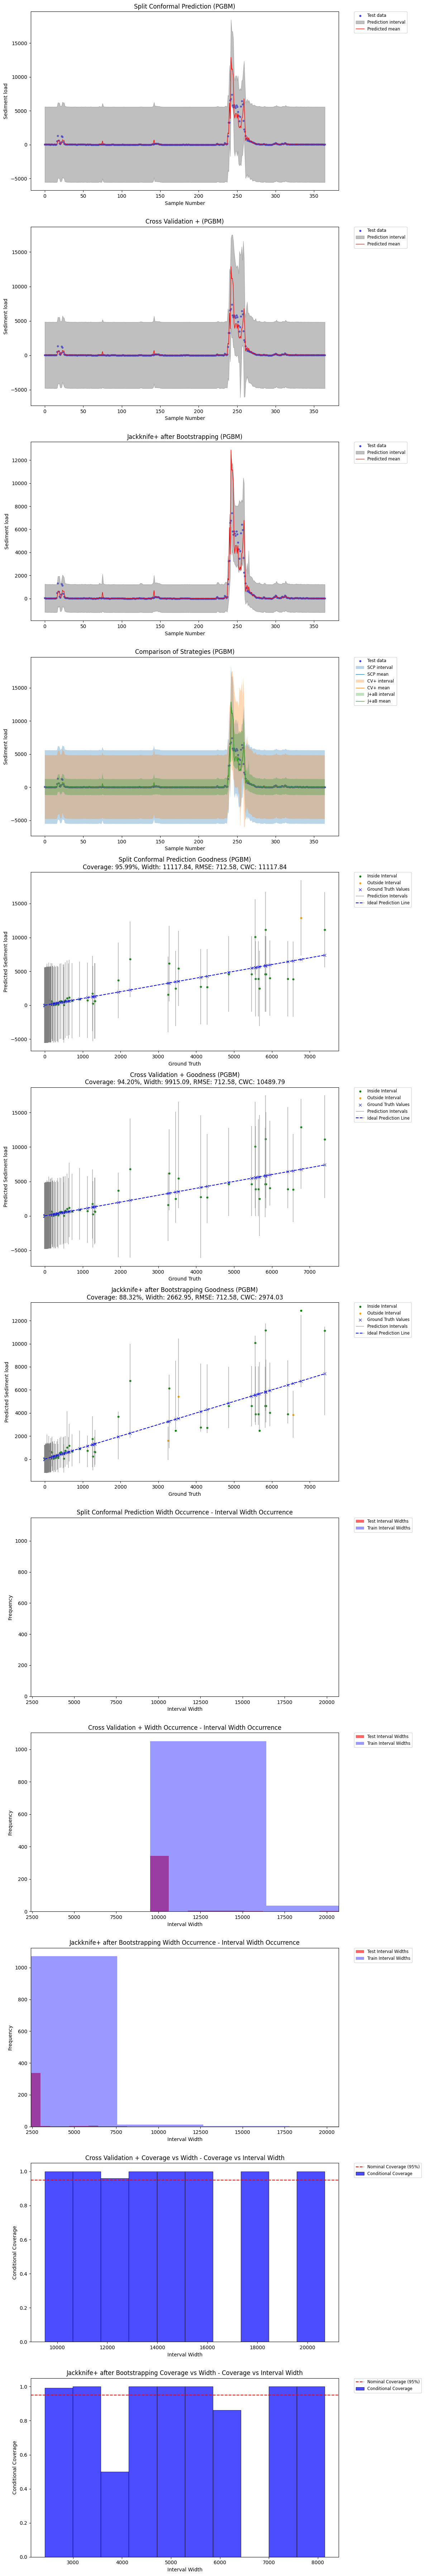

In [43]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax



def conformal_predictions_MAPIE_PGBM(
    model_class,
    best_params,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    excel_file_path
):
    SEED = 123
    np.random.seed(SEED)
    MISCOVERAGE = 0.05
    warnings.filterwarnings("ignore")
    os.makedirs('output/regression', exist_ok=True)

    # Convert y_test to a NumPy array if it has to_numpy
    y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

    # Map method names to descriptive labels
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }

    # Corresponding parameters for each strategy
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Create a base estimator object for each strategy
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    # Fit & predict using MapieRegressor for each strategy
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set


    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred)
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the intervals and predictions for each strategy
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names)*3 + 1 + len(_strategies)
    fig, axs = plt.subplots(nrows=n_figs, figsize=(12, 6 * n_figs))
    plot_index = 0

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                            color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red',
                                    label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('Sediment load')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Comparison subplot (moved after individual strategy plots)
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                        alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name],
                                label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('Sediment load')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1


    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted Sediment load')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1


    fig.tight_layout()

    # Save plots to Excel
    # Save plots to Excel
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        sheet_name = 'conformal_predictions_MAPIE'
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        #NEW: Save all predictions/intervals to one worksheet
        all_rows = []
        # Always use y_test_np for consistent array-ness
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = ((y_test_np >= ymin_np) & (y_test_np <= ymax_np)).astype(int)
            residual_np = y_test_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_test_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np,
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet2 = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet2.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet2.cell(row=i+2, column=j, value=float(value) if isinstance(value, np.generic) else value)

        # Save the workbook
        workbook.save(excel_file_path)



# Example call (assuming best_params, X_train, y_train, X_test, y_test are defined elsewhere)
conformal_predictions_MAPIE_PGBM(
    model_class=PGBMWrapper,
    best_params=best_params,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    model_name="PGBM",
    excel_file_path="./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/PGBM.xlsx"
)

In [44]:
def conformal_predictions_PUNCC_PGBM(
    X_train,
    y_train,
    X_test,
    y_test,
    best_scores_autosampler,
    model_class,
    excel_file_path=None,
    model_params=None,
    alpha=0.1
):
    if model_params is None:
        if model_class.__name__ == 'PGBMWrapper':
            model_params = get_best_model_params(best_scores_autosampler, 'PGBM')
        else:
            model_params = {}

    # Initialize model
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    # Convert to NumPy arrays if needed
    y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    model.fit(X_train, y_train_np)

    y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

    def evaluate_cp(X_test_eval, y_test_eval, model_cp, alpha_val):
        X_test_np = X_test_eval.to_numpy() if isinstance(X_test_eval, pd.DataFrame) else np.array(X_test_eval)
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test_np, alpha=alpha_val)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test_eval, y_pred_lower, y_pred_upper)
        return y_pred, y_pred_lower, y_pred_upper, sharpness, coverage

    # Base predictor setup
    base_predictor = BasePredictor(model, is_trained=True)

    # SplitCP
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train_np, fit_ratio=0.5)

    y_pred_sc, y_lower_sc, y_upper_sc, sharpness_sc, coverage_sc = evaluate_cp(X_test, y_test_np, splitcp, alpha)

    # CVPlus
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train_np)
    y_pred, y_lower_cv, y_upper_cv, sharpness_cv, coverage_cv = evaluate_cp(X_test, y_test_np, cvplus, alpha)

    # CQR
    X_fit, X_calib, y_fit, y_calib = train_test_split(X_train, y_train_np, test_size=0.5, random_state=0)
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)
    upper_quantile_model.fit(X_fit, y_fit)
    lower_quantile_model.fit(X_fit, y_fit)
    dualpredictor = DualPredictor([lower_quantile_model, upper_quantile_model], is_trained=[True, True])
    cqr = CQR(dualpredictor, train=False)
    cqr.fit(X_calib=X_calib, y_calib=y_calib)
    y_pred_cqr, y_lower_cqr, y_upper_cqr, sharpness_cqr, coverage_cqr = evaluate_cp(X_test, y_test_np, cqr, alpha)
    y_pred_cqr = 0.5 * (y_lower_cqr + y_upper_cqr)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness_sc:.3f}")
    print(f"SplitCP - Average coverage: {coverage_sc*100:.3f}%")
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cv:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cv*100:.3f}%")
    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")


    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    sample_indices = np.arange(len(y_test_np))

    # Plot results for each method
    for idx, (y_pred, y_lower, y_upper, title) in enumerate([
        (y_pred_sc, y_lower_sc, y_upper_sc, 'SplitCP'),
        (y_pred_sc, y_lower_cv, y_upper_cv, 'CVPlus'),
        (y_pred_cqr, y_lower_cqr, y_upper_cqr, 'CQR')
    ]):
        axs[idx].scatter(sample_indices, y_test_np, label='True', color='blue', s=10, alpha=0.7)
        axs[idx].fill_between(sample_indices, y_lower, y_upper, color='gray', alpha=0.5, label='Prediction interval')
        axs[idx].plot(sample_indices, y_pred, color='red', label='Predicted mean', linewidth=1)
        axs[idx].set_title(f'{title}: Prediction Intervals with Conformal Prediction')
        axs[idx].set_xlabel('Sample Number')
        axs[idx].set_ylabel('Sediment load')
        axs[idx].legend(fontsize='small')

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_sc).reshape(-1),
        'SplitCP_lower': np.asarray(y_lower_sc).reshape(-1),
        'SplitCP_upper': np.asarray(y_upper_sc).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_sc).reshape(-1),
        'CVPlus_lower': np.asarray(y_lower_cv).reshape(-1),
        'CVPlus_upper': np.asarray(y_upper_cv).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_upper_cqr).reshape(-1),
    }

    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

# Example usage (assuming X_train, y_train, X_test, y_test, best_scores_autosampler exist):
conformal_predictions_PUNCC_PGBM(
    X_train, y_train,
    X_test, y_test,
    best_scores_autosampler=best_scores_autosampler,
    model_class=PGBMWrapper,
    excel_file_path="./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/PGBM.xlsx",
    alpha=0.1
)


Training on CPU
Estimator 0/500, Train metric: 4846.1777
Estimator 1/500, Train metric: 4832.4189
Estimator 2/500, Train metric: 4823.9175
Estimator 3/500, Train metric: 4806.1133
Estimator 4/500, Train metric: 4788.0835
Estimator 5/500, Train metric: 4772.2974
Estimator 6/500, Train metric: 4755.6216
Estimator 7/500, Train metric: 4742.0635
Estimator 8/500, Train metric: 4731.2695
Estimator 9/500, Train metric: 4715.9517
Estimator 10/500, Train metric: 4701.6528
Estimator 11/500, Train metric: 4690.1465
Estimator 12/500, Train metric: 4677.1211
Estimator 13/500, Train metric: 4664.7495
Estimator 14/500, Train metric: 4655.3594
Estimator 15/500, Train metric: 4639.9062
Estimator 16/500, Train metric: 4629.5317
Estimator 17/500, Train metric: 4614.8535
Estimator 18/500, Train metric: 4600.8701
Estimator 19/500, Train metric: 4589.1313
Estimator 20/500, Train metric: 4576.2651
Estimator 21/500, Train metric: 4563.2134
Estimator 22/500, Train metric: 4550.3882
Estimator 23/500, Train metr

In [45]:
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, PGBMWrapper, best_params,"./drive/MyDrive/suspended sediment/SS_uncertainity/SS_ml/Conformal_Predictions(MAPIE,PUNCC)/PGBM.xlsx", "PGBM Prediction Intervals")

Training on CPU
Estimator 0/100, Train metric: 4525.9702
Estimator 1/100, Train metric: 4230.7808
Estimator 2/100, Train metric: 3971.0767
Estimator 3/100, Train metric: 3741.8857
Estimator 4/100, Train metric: 3522.7593
Estimator 5/100, Train metric: 3329.1907
Estimator 6/100, Train metric: 3159.2012
Estimator 7/100, Train metric: 3010.3923
Estimator 8/100, Train metric: 2879.4783
Estimator 9/100, Train metric: 2766.0249
Estimator 10/100, Train metric: 2639.6096
Estimator 11/100, Train metric: 2524.8875
Estimator 12/100, Train metric: 2421.3308
Estimator 13/100, Train metric: 2326.9243
Estimator 14/100, Train metric: 2238.0566
Estimator 15/100, Train metric: 2162.2827
Estimator 16/100, Train metric: 2089.9739
Estimator 17/100, Train metric: 2024.0220
Estimator 18/100, Train metric: 1965.8950
Estimator 19/100, Train metric: 1913.0566
Estimator 20/100, Train metric: 1864.8459
Estimator 21/100, Train metric: 1821.4386
Estimator 22/100, Train metric: 1783.4601
Estimator 23/100, Train metr